##cat vs dog(Tensorflow)_part1(전처리)

이번에는 텐서플로우 이미지를 다루기에 기본이라고 알려진

개, 고양이 분류 모델을 한번 만들어보겠습니다.

데이터는 https://www.kaggle.com/c/dogs-vs-cats <- 이쪽에서 받았습니다.

데이터가 상당히 난잡하여 데이터부터 전처리를 하고 모델을 만들어볼께요

###구글 드라이브 임포트

구글드라이브에 개, 고양이 파일을 올려놓아서 임포트 시킵니다.

In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


---

###압축풀기

해당파일은 zip파일 형식으로 되어있어 압축을 풀어줍니다.

In [ ]:
%cd "/content/drive/MyDrive/pic/cat_dog"
!unzip "test1.zip"

In [ ]:
%cd "/content/drive/MyDrive/pic/cat_dog"
!unzip "train.zip"

---

###데이터 갯수 확인

압축을 풀고 전체 데이터 갯수를 알아봅시다.

In [4]:
import os

DIR_IN = "/content/drive/MyDrive/pic/cat_dog/train"

file_list = os.listdir(DIR_IN)
file_list_jpg = [file for file in file_list]
file_list_jpg.sort()

In [5]:
len(file_list_jpg)

25000

In [6]:
DIR_IN = "/content/drive/MyDrive/pic/cat_dog/test1"

file_list_test = os.listdir(DIR_IN)
file_list_jpg = [file for file in file_list_test]
file_list_jpg.sort()

In [7]:
len(file_list_jpg)

12500

---

###파일 생성

데이터를 옮겨 넣어줄 파일을 생성합니다.

In [8]:
base_dir = '/content/drive/MyDrive/pic/last_data'
os.mkdir(base_dir)

#train, test 폴더 생성
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [9]:
#train, test 폴더안에 이미지 폴더 생성
images_dir = os.path.join(train_dir, 'dog')
os.mkdir(images_dir)
labels_dir = os.path.join(train_dir, 'cat')
os.mkdir(labels_dir)

images_dir2 = os.path.join(test_dir, 'dog')
os.mkdir(images_dir2)
labels_dir2 = os.path.join(test_dir, 'cat')
os.mkdir(labels_dir2)

---

###데이터 옮기기(dog)

현재 데이터는 test 데이터를 제외하고는 하나의 폴더에 개, 고양이 사진이

한꺼번에 들어 있습니다.

지금부터 데이터 분리 작업을 해보겠습니다.

In [10]:
DIR_IN = "/content/drive/MyDrive/pic/cat_dog/train"

file_list = os.listdir(DIR_IN)
file_list_dog_jpg = [file for file in file_list if file.startswith("dog", 0) and file.endswith(".jpg")]
file_list_dog_jpg.sort()

In [11]:
len(file_list_dog_jpg)

12500

In [12]:
import math

#전체 데이터중 80 학습으로 20 테스트
train_ima_size = math.floor(len(file_list_dog_jpg) * 0.8)
test_ima_size = math.floor(len(file_list_dog_jpg) * 0.2)
print(train_ima_size)
print(test_ima_size)

10000
2500


In [13]:
import shutil
#속도를 높여주는 방법법
def _copyfileobj_patched(fsrc, fdst, length=16*1024*1024):
    while 1:
        buf = fsrc.read(length)
        if not buf:
            break
        fdst.write(buf)


shutil.copyfileobj = _copyfileobj_patched 

In [15]:
tar = '/content/drive/MyDrive/pic/last_data/train/dog'

#전체 데이터중 80퍼의 사진을 train/dog로 옮김
for i in file_list_dog_jpg[:train_ima_size]:
  src = os.path.join(DIR_IN, i)
  shutil.move(src, tar)

In [19]:
DIR_IN = "/content/drive/MyDrive/pic/cat_dog/train"

file_list = os.listdir(DIR_IN)
file_list_dog_jpg = [file for file in file_list if file.startswith("dog", 0) and file.endswith(".jpg")]
file_list_dog_jpg.sort()

In [20]:
len(file_list_dog_jpg)

2500

In [21]:
tar = '/content/drive/MyDrive/pic/last_data/test/dog'

#전체 데이터중 20퍼의 사진을 test/dog로 옮김
for i in file_list_dog_jpg:
  src = os.path.join(DIR_IN, i)
  shutil.move(src, tar)

In [28]:
DIR_IN = "/content/drive/MyDrive/pic/last_data/train/dog"

file_list = os.listdir(DIR_IN)
file_list_dog_jpg = [file for file in file_list if file.startswith("dog", 0) and file.endswith(".jpg")]
file_list_dog_jpg.sort()

In [29]:
len(file_list_dog_jpg)

10000

In [30]:
DIR_IN = "/content/drive/MyDrive/pic/last_data/test/dog"

file_list = os.listdir(DIR_IN)
file_list_dog_jpg = [file for file in file_list if file.startswith("dog", 0) and file.endswith(".jpg")]
file_list_dog_jpg.sort()

In [31]:
len(file_list_dog_jpg)

2500

In [32]:
DIR_IN = "/content/drive/MyDrive/pic/cat_dog/train"

file_list = os.listdir(DIR_IN)
file_list_dog_jpg = [file for file in file_list if file.startswith("dog", 0) and file.endswith(".jpg")]
file_list_dog_jpg.sort()

In [33]:
len(file_list_dog_jpg)

0

---

###데이터 옮기기(cat)

In [34]:
DIR_IN = "/content/drive/MyDrive/pic/cat_dog/train"

file_list = os.listdir(DIR_IN)
file_list_cat_jpg = [file for file in file_list if file.startswith("cat", 0) and file.endswith(".jpg")]
file_list_cat_jpg.sort()

In [35]:
len(file_list_cat_jpg)

12500

In [36]:
tar = '/content/drive/MyDrive/pic/last_data/train/cat'

#전체 데이터중 80퍼의 사진을 train/dog로 옮김
for i in file_list_cat_jpg[:train_ima_size]:
  src = os.path.join(DIR_IN, i)
  shutil.move(src, tar)

In [37]:
DIR_IN = "/content/drive/MyDrive/pic/cat_dog/train"

file_list = os.listdir(DIR_IN)
file_list_cat_jpg = [file for file in file_list if file.startswith("cat", 0) and file.endswith(".jpg")]
file_list_cat_jpg.sort()

In [38]:
len(file_list_cat_jpg)

2500

In [62]:
tar = '/content/drive/MyDrive/pic/last_data/test/cat'

#전체 데이터중 20퍼의 사진을 test/dog로 옮김
for i in file_list_cat_jpg:
  src = os.path.join(DIR_IN, i)
  shutil.move(src, tar)

In [43]:
DIR_IN = "/content/drive/MyDrive/pic/last_data/train/cat"

file_list = os.listdir(DIR_IN)
file_list_cat_jpg = [file for file in file_list if file.startswith("cat", 0) and file.endswith(".jpg")]
file_list_cat_jpg.sort()

In [44]:
len(file_list_cat_jpg)

10000

In [46]:
DIR_IN = "/content/drive/MyDrive/pic/last_data/test/dog"

file_list = os.listdir(DIR_IN)
file_list_cat_jpg = [file for file in file_list if file.startswith("cat", 0) and file.endswith(".jpg")]
file_list_cat_jpg.sort()

In [47]:
len(file_list_cat_jpg)

2500

In [48]:
DIR_IN = "/content/drive/MyDrive/pic/cat_dog/train"

file_list = os.listdir(DIR_IN)
file_list_cat_jpg = [file for file in file_list if file.startswith("cat", 0) and file.endswith(".jpg")]
file_list_cat_jpg.sort()

In [49]:
len(file_list_cat_jpg)

0

---

###데이터 갯수 확인

제대로 옮겨졌는지 데이터 갯수를 확인해보겠습니다.

In [3]:
import os
DIR_IN = "/content/drive/MyDrive/pic/last_data/train/dog"

file_list = os.listdir(DIR_IN)
file_list_jpg = [file for file in file_list]
file_list_jpg.sort()

In [4]:
len(file_list_jpg)

10000

In [5]:
DIR_IN = "/content/drive/MyDrive/pic/last_data/train/cat"

file_list = os.listdir(DIR_IN)
file_list_jpg = [file for file in file_list]
file_list_jpg.sort()

In [ ]:
len(file_list_jpg)

10000

In [69]:
DIR_IN = "/content/drive/MyDrive/pic/last_data/test/dog"

file_list = os.listdir(DIR_IN)
file_list_jpg = [file for file in file_list]
file_list_jpg.sort()

In [70]:
len(file_list_jpg)

2500

In [71]:
DIR_IN = "/content/drive/MyDrive/pic/last_data/test/cat"

file_list = os.listdir(DIR_IN)
file_list_jpg = [file for file in file_list]
file_list_jpg.sort()

In [72]:
len(file_list_jpg)

2500

---

###학습 데이터 만들기

학습 데이터까지 제대로 만들어지는지 확인해봅시다.

dog에 1만장, cat에 1만장이 있었으니 train 폴더에는 전체 2만장의 데이터가 있어야합니다.

In [74]:
import numpy as np
import PIL
import cv2
from glob import glob

#root로 경로 지정 후 사이즈를 32, 32으로 만들어서 빈 리스트에 넣어줍니다.
root = '/content/drive/MyDrive/pic/last_data/train/'
training_images = []
training_labels = []

for filename in sorted(glob(root +"*")):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img)
        img_array = np.array(an_img)
        img_resize = cv2.resize(img_array, (32,32))
        training_images.append(img_resize)
        label = filename.split('\\')[-1]
        training_labels.append(label)
  
training_images = np.array(training_images)
training_labels = np.array(training_labels)

#라벨 인코딩을 실시하여 숫자값을 가지게 해줍니다.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_labels= le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1,1)

print(training_images.shape)

(20000, 32, 32, 3)


In [75]:
print(training_labels.shape)

(20000, 1)


----

###테스트 데이터 만들기

dog에 2500장, cat에 2500장이 있었으니 train 폴더에는 전체 5000장의 데이터가 있어야합니다.

In [76]:
root = '/content/drive/MyDrive/pic/last_data/test/'
test_images = []
test_labels = []

for filename in sorted(glob(root +"*")):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img)
        img_array = np.array(an_img)
        img_resize = cv2.resize(img_array, (30,30))
        test_images.append(img_resize)
        label = filename.split('\\')[-1]
        test_labels.append(label)
  
test_images = np.array(test_images)
test_labels = np.array(test_labels)

from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
test_labels= le1.fit_transform(test_labels)
test_labels = test_labels.reshape(-1,1)

print(test_images.shape)
print(test_labels.shape)

(5000, 30, 30, 3)
(5000, 1)


###시각화 하여 확인

[0],[0],[0],[0],[0],[1],[1],[1],[1],[1],

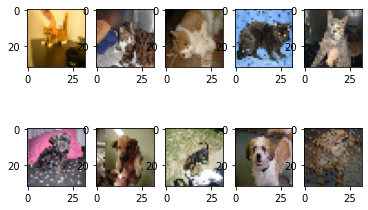

In [77]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(training_images[i*2000])
    print(training_labels[i*2000], end=",")
plt.show()

[0],[0],[0],[0],[0],[1],[1],[1],[1],[1],

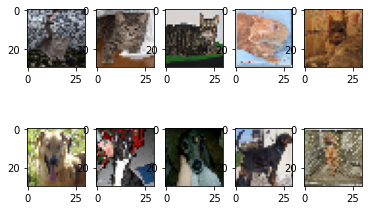

In [78]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i*500])
    print(test_labels[i*500], end=",")
plt.show()

----